In [1]:
!pip install langchain chromadb sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.5/973.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.8/526.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.5/308.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.8/122.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# packages
import re
import pandas as pd
import seaborn as sns
from langchain.text_splitter import SentenceTransformersTokenTextSplitter
import chromadb
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction
from pprint import pprint


In [3]:
# max_length
def max_word_count(txt_list:list):
    max_length = 0
    for txt in txt_list:
        word_count = len(re.findall(r'\w+', txt))
        if word_count > max_length:
            max_length = word_count
    return f"Max Word Count: {max_length} words"

In [4]:
# Sentence splitter
# chroma default sentence model "all-MiniLM-L6-v2"
# https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
# max input length: 256 characters
model_max_chunk_length = 256
token_splitter = SentenceTransformersTokenTextSplitter(
    tokens_per_chunk=model_max_chunk_length,
    model_name="all-MiniLM-L6-v2",
    chunk_overlap=0
)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
!wget https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv

--2024-05-29 05:39:33--  https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5698602 (5.4M) [text/csv]
Saving to: ‘tmdb_5000_movies.csv’

tmdb_5000_movies.cs 100%[===================>]   5.43M  26.8MB/s    in 0.2s    

2024-05-29 05:39:34 (26.8 MB/s) - ‘tmdb_5000_movies.csv’ saved [5698602/5698602]



In [6]:
df_movies_raw = pd.read_csv('tmdb_5000_movies.csv')

In [7]:
df_movies_raw.head(5)
print(len(df_movies_raw))

4803


In [8]:
#%% filter movies for missing title or overwiew
selected_cols = ['id', 'title', 'overview', 'vote_average', 'release_date']
df_movies_filt = df_movies_raw[selected_cols].dropna()
# filter for unique ids
df_movies_filt = df_movies_filt.drop_duplicates(subset=['id'])

df_movies_filt.shape

(4799, 5)

In [9]:
max_word_count(df_movies_filt['overview'])

'Max Word Count: 176 words'

In [10]:
# Word Distribution
descriptions_len = []
for txt in df_movies_filt.loc[:, "overview"]:
    descriptions_len.append(len(re.findall(r'\w+', txt)))


<Axes: ylabel='Count'>

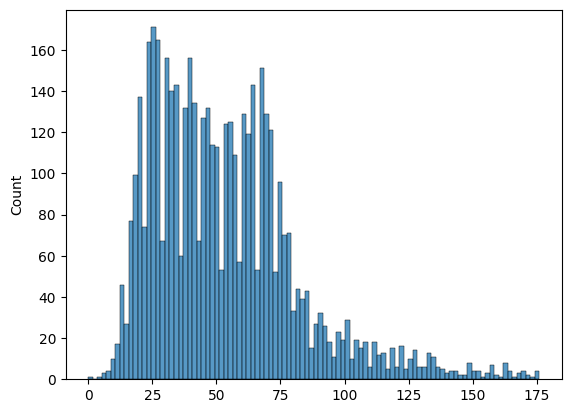

In [11]:
# visualize token distribution
sns.histplot(descriptions_len, bins=100)

In [12]:
embedding_fn = SentenceTransformerEmbeddingFunction()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [13]:
# chroma_db = chromadb.Client()  # on the fly
# persistent
chroma_db = chromadb.PersistentClient(path="db")

In [14]:
# Get / Create Collection
chroma_collection = chroma_db.create_collection("movies", embedding_function=embedding_fn)
# chroma_collection = chroma_db.get_collection("movies")
# chroma_collection = chroma_db.get_or_create_collection("movies")

In [15]:
chroma_db.list_collections()

[Collection(name=movies)]

In [16]:
# add all tokens to collection
ids = [str(i) for i in df_movies_filt['id'].tolist()]
documents = df_movies_filt['overview'].tolist()
titles = df_movies_filt['title'].tolist()
metadatas = [{'source': title} for title in titles]

In [17]:
chroma_collection.add(documents=documents, ids=ids, metadatas=metadatas)

In [18]:
# count of documents in collection
len(chroma_collection.get()['ids'])

4799

In [19]:
# Run a Query
def get_title_by_description(query_text:str):
    n_results = 3
    res = chroma_collection.query(query_texts=[query_text], n_results=n_results)
    for i in range(n_results):
        pprint(f"Title: {res['metadatas'][0][i]['source']} \n")
        pprint(f"Description: {res['documents'][0][i]} \n")
        pprint("-------------------------------------------------")

In [20]:
# Run a Query
get_title_by_description(query_text="monster, underwater")

'Title: Creature \n'
('Description: An amphibious shark-like monster terrorizes an abandoned secret '
 'military base and the people who live on the island it is located on. A '
 'marine biologist, as well as several other people, try to stop it before it '
 'is too late... \n')
'-------------------------------------------------'
'Title: Shin Godzilla \n'
('Description: From the mind behind Evangelion comes a hit larger than life.  '
 'When a massive, gilled monster emerges from the deep and tears through the '
 'city, the government scrambles to save its citizens.  A rag-tag team of '
 "volunteers cuts through a web of red tape to uncover the monster's weakness "
 'and its mysterious ties to a foreign superpower.  But time is not on their '
 'side - the greatest catastrophe to ever befall the world is about to evolve '
 'right before their very eyes. \n')
'-------------------------------------------------'
'Title: Sea Rex 3D: Journey to a Prehistoric World \n'
('Description: Through t

In [21]:
get_title_by_description(query_text="superhero, spider")

'Title: Spider-Man 3 \n'
('Description: The seemingly invincible Spider-Man goes up against an all-new '
 'crop of villain – including the shape-shifting Sandman. While Spider-Man’s '
 'superpowers are altered by an alien organism, his alter ego, Peter Parker, '
 'deals with nemesis Eddie Brock and also gets caught up in a love '
 'triangle. \n')
'-------------------------------------------------'
'Title: Spider-Man \n'
('Description: After being bitten by a genetically altered spider, nerdy high '
 'school student Peter Parker is endowed with amazing powers. \n')
'-------------------------------------------------'
'Title: Spider-Man 2 \n'
('Description: Peter Parker is going through a major identity crisis. Burned '
 'out from being Spider-Man, he decides to shelve his superhero alter ego, '
 'which leaves the city suffering in the wake of carnage left by the evil Doc '
 "Ock. In the meantime, Parker still can't act on his feelings for Mary Jane "
 "Watson, a girl he's loved since chi

# RAG

In [23]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 4.4 MB/s eta 0:00:00


In [36]:
# packages
import os
from pprint import pprint
import chromadb
import openai
from openai import OpenAI
api_key = '' # your api key

In [32]:
# Run a Query
def get_query_results(query_text:str, n_results:int=5):
    res = chroma_collection.query(query_texts=[query_text], n_results=3)
    docs = res["documents"][0]
    titles = [item['source'] for item in res["metadatas"][0]]
    res_string = ';'.join([f'{title}: {description}' for title, description in zip(titles, docs)])
    return res_string

query_text = "a monster in the closet"
retrieved_results = get_query_results(query_text)

In [33]:
retrieved_results

'Lady in White: Locked in a school closet during Halloween 1962, young Frank witnesses the ghost of a young girl and the man who murdered her years ago. Shortly afterward he finds himself stalked by the killer and is soon drawn to an old house where a mysterious Lady In White lives. As he discovers the secret of the woman he soon finds that the killer may be someone close to him.;C.H.U.D.: A rash of bizarre murders in New York City seems to point to a group of grotesquely deformed vagrants living in the sewers. A courageous policeman, a photo journalist and his girlfriend, and a nutty bum, who seems to know a lot about the creatures, band together to try and determine what the creatures are and how to stop them.;Room: Jack is a young boy of 5 years old who has lived all his life in one room. He believes everything within it are the only real things in the world. But what will happen when his Ma suddenly tells him that there are other things outside of Room?'

In [34]:
# RAG
system_role_definition = "You are a an expert in movies. Users will ask you questions about movies. You will get a user question, and relevant information. Relevant information is structured like movie title:movie plot; ... Please answer the question only using the information provided."
user_query = "What are the names of the movies and their plot where {user_query}?"
messages = [
    {"role": "system",
     "content": system_role_definition
     },
    {"role": "user",
     "content": f"{user_query}; \n Information: {retrieved_results}"
     }
]

In [37]:
openai_client = OpenAI(api_key=api_key)
model="gpt-3.5-turbo"
response = openai_client.chat.completions.create(
    model=model,
    messages=messages
)

In [38]:
content = response.choices[0].message.content

In [40]:
print(content)

The movie titles and their plots relevant to your question are:
1. Lady in White: Locked in a school closet during Halloween 1962, young Frank witnesses the ghost of a young girl and the man who murdered her years ago. As he discovers the secret of the woman, he soon finds that the killer may be someone close to him.
2. C.H.U.D.: A rash of bizarre murders in New York City seems to point to a group of grotesquely deformed vagrants living in the sewers. A courageous policeman, a photo journalist and his girlfriend, and a nutty bum band together to try and determine what the creatures are and how to stop them.
3. Room: Jack is a young boy of 5 years old who has lived all his life in one room. His Ma suddenly tells him there are other things outside of Room, challenging his understanding of the world he knows.


In [43]:
# bundle everything in a function
def rag(user_query:str):
    retrieved_results = get_query_results(user_query)
    system_role_definition = "You are a an expert in movies. Users will ask you questions about movies. You will get a user question, and relevant information. Relevant information is structured like movie title:movie plot; ... Please answer the question only using the information provided."
    user_query_complete = f"What are the names of the movies and their plot where {user_query}?"
    messages = [
        {"role": "system",
        "content": system_role_definition
        },
        {"role": "user",
        "content": f"{user_query_complete}; \n Information: {retrieved_results}"
        }
    ]
    openai_client = OpenAI(api_key=api_key)
    model="gpt-3.5-turbo"
    response = openai_client.chat.completions.create(
        model=model,
        messages=messages
    )
    content = response.choices[0].message.content
    return content


In [45]:
# Response from Vector DB
print("Response from Vector DB")
print("-------------------------------------------------")
query = "a cop is chasing a criminal"
pprint(get_query_results(query))

print("Response from RAG")
print("-------------------------------------------------")
pprint(rag(query))


Response from Vector DB
-------------------------------------------------
('Training Day: On his first day on the job as a narcotics officer, a rookie '
 "cop works with a rogue detective who isn't what he appears.;Pineapple "
 'Express: A stoner and his dealer are forced to go on the run from the police '
 'after the pothead witnesses a cop commit a murder.;In Too Deep: A fearless '
 "cop is taking on a ruthless crimelord. He knew the risks. He just didn't "
 'know how far he would have to go.')
Response from RAG
-------------------------------------------------
('The movies where a cop is chasing a criminal are:\n'
 '1. "Training Day": On his first day on the job as a narcotics officer, a '
 "rookie cop works with a rogue detective who isn't what he appears.\n"
 '2. "Pineapple Express": A stoner and his dealer are forced to go on the run '
 'from the police after the pothead witnesses a cop commit a murder.\n'
 '3. "In Too Deep": A fearless cop is taking on a ruthless crimelord. He k